## 1. Describe the distribution and the generating story. Why is your particular problem an example of it?
**Exponential Distribution**

[From wikipedia](https://en.wikipedia.org/wiki/Exponential_distribution): "the exponential distribution is the probability distribution of the time between events in a Poisson point process". Like Shannon, I measured the time intervals between cars passing my office window. If I converted my data to numbers of cars per minute, I would have a poisson distribution, but the time interval between those possion point events is an exponential distribution.

## 2. Collect the data

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
car_intervals = pd.read_csv("arrival_times.csv")

## 3. Estimate parameters from the data and plot both the data and the reference distribution

In [3]:
scale = car_intervals.mean().iloc[0]
print(f"The scale parameter is {scale:0.2f} seconds")

The scale parameter is 8.42 seconds


In [4]:
# What does the pdf of an expoential distrbution look like with this scale parameter
e = expon.pdf(np.arange(0, car_intervals.max().iloc[0], step = 1.0), scale = scale)

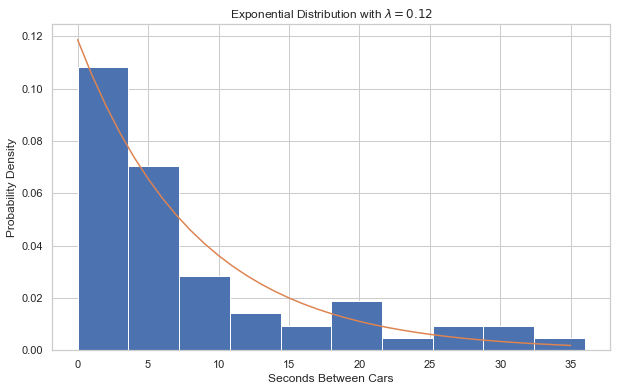

In [8]:
# Now plot the data
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.set_title( f"Exponential Distribution with $\lambda={1/scale:.2f}$")
axes.set_ylabel( "Probability Density")
axes.set_xlabel( "Seconds Between Cars")
axes.hist(car_intervals.values, density = True)
axes.plot(e)


This plot of the empirical data and the overlaid PDF seem to match fairly well